# Principal Component Analysis
* The main idea of principal component analysis is derived from transformation of axis. 
* Suppose two variables have the scatter plot as shown below. Then the first principal component axis is denoted by pc1 and second one pc2. As we can see they are simple rotation of the original axeses
* The process of deciding the principal axes are as follows:
  1. The first direction of PCA is the direction of highest variability (i.e. highest spread).
  2. Keeping this direction fixed, we search in directions orthogonal to the first direction and select the one having highest spread.
  3. This step is repeated and we obtain n principal component axis for n-variables.
* Mathematically the n principal axes are in the direction of n eigen vectors of the covariance matrix of the n-features.
* So, we obtain n-independent directions.
* The eigen-values corresponding to the eigen-vectors are the variability in that direction. Sum total of the eigen-vaues represent the total variability in the data.
* After finding the eigen-vectors and eigen-values we sort them by eigen-values in desecending order and plot a scree-plot.
* Then we select the top m components displaying the most of the variability

![alt text](pca.png "Title")

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [404]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [405]:
car = pd.read_csv('CarPrice_Assignment.csv')

In [406]:
car = car.select_dtypes(include=np.number)

In [407]:
car.drop('car_ID',axis=1,inplace=True)

In [408]:
car = car[['curbweight','enginesize','carlength','carwidth','carheight','price']]

In [409]:
car.corr()

,curbweight,enginesize,carlength,carwidth,carheight,price
curbweight,1.000000,0.850594,0.877728,0.867032,0.295572,0.835305
enginesize,0.850594,1.000000,0.683360,0.735433,0.067149,0.874145
carlength,0.877728,0.683360,1.000000,0.841118,0.491029,0.682920
carwidth,0.867032,0.735433,0.841118,1.000000,0.279210,0.759325
carheight,0.295572,0.067149,0.491029,0.279210,1.000000,0.119336
price,0.835305,0.874145,0.682920,0.759325,0.119336,1.000000


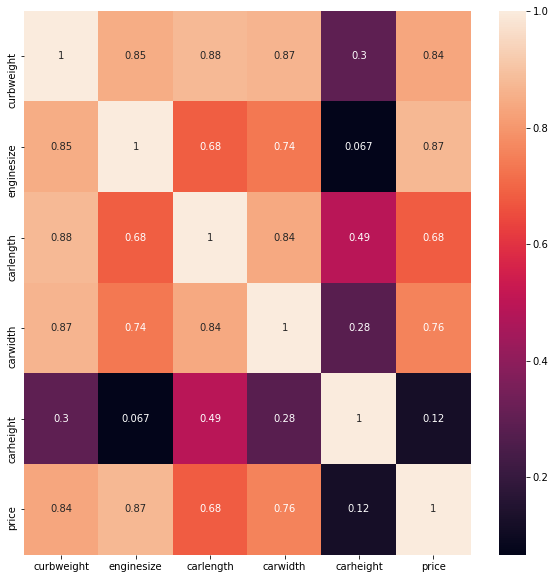

In [410]:
plt.figure(figsize=(10,10))
sb.heatmap(car.corr(),annot=True)

In [411]:
y = car['price']
X = car.drop('price',axis=1)
X_sm = sm.add_constant(X)
lr = sm.OLS(y,X_sm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           3.36e-68
Time:                        13:49:26   Log-Likelihood:                -1965.9
No. Observations:                 205   AIC:                             3944.
Df Residuals:                     199   BIC:                             3964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.439e+04   1.44e+04     -3.075      0.002   -7.29e+04   -1.59e+04
curbweight     4.7000      1.526      3.079      0.002       1.690       7.710
enginesize   108.4139     12.390      8.750      0.000      83.981     132.847
carlength    -85.5354     53.076     -1.612      0.109    -190.200      19.129
carwidth     701.4683    252.672      2.776      0.006     203.211    1199.726
carheight     10.1939    131.449      0.078      0.938    -249.019     269.406
==============================================================================
Omnibus:                       56.421   Durbin-Watson:                   0.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.175
Skew:                           1.150   Prob(JB):                     6.08e-36
Kurtosis:                       6.701   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [412]:
def get_vif(x_train_sm):
    vif = pd.DataFrame()
    x_train_sm = x_train_sm.drop('const',axis=1)
    vif['features'] = x_train_sm.columns
    vif['VIF'] = [VIF(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values('VIF',ascending=False))

In [413]:
get_vif(X_sm)

     features      VIF
2   carlength  1339.32
3    carwidth   884.77
4   carheight   688.32
0  curbweight   190.50
1  enginesize    43.24


In [414]:
y = car['price']
car_X = car.drop('price',axis=1)
#removing mean to centre the data
car_X = (car_X - np.mean(car_X))

In [415]:
car_array = car_X.values.T

In [416]:
covar_car = np.dot(car_array,car_array.T)/car_array.shape[1]

In [417]:
covar_car = np.cov(car_array,bias=True)

In [418]:
w,v = np.linalg.eig(covar_car)

In [419]:
w

array([2.71156700e+05, 4.78146814e+02, 3.36109341e+01, 9.71750319e-01,
       3.60960635e+00])

In [420]:
car_array.shape

(5, 205)

In [421]:
transformed = np.dot(v,car_array).T

In [422]:
transformed.shape

(205, 5)

In [423]:
car_new = pd.DataFrame(transformed,columns=['e1','e2','e3','e4','e5'])

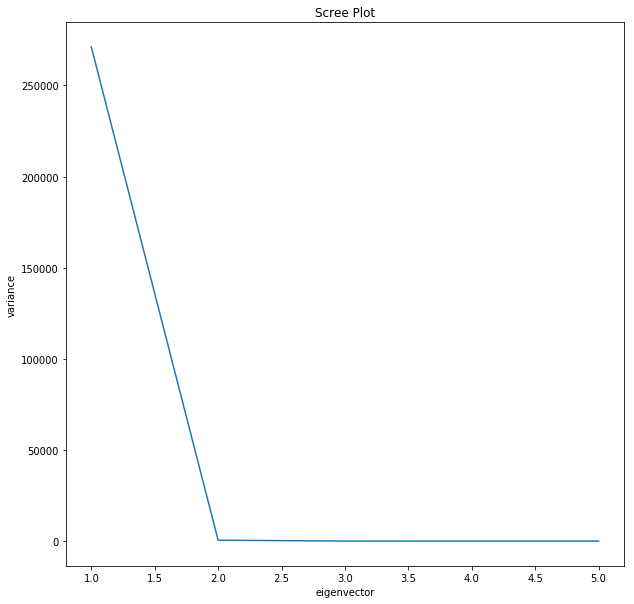

In [424]:
plt.figure(figsize=(10,10))
plt.title('Scree Plot')
plt.xlabel('eigenvector')
plt.ylabel('variance')
x =list(range(1,len(w)+1))
sb.lineplot(x=x,y=w)

In [425]:
percent_var = np.cumsum(w)/np.sum(w)

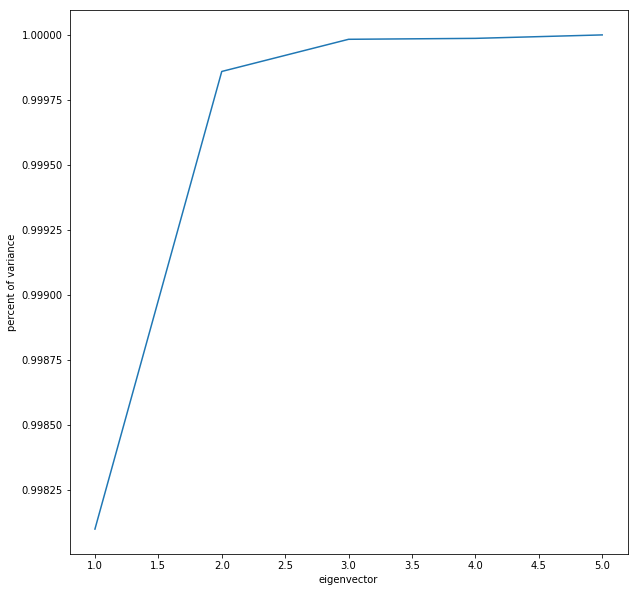

In [426]:
plt.figure(figsize=(10,10))
plt.xlabel('eigenvector')
plt.ylabel('percent of variance')
x =list(range(1,len(w)+1))
sb.lineplot(x=x,y=percent_var)

In [427]:
X = car_new[['e1','e2']]

In [428]:
X_sm = sm.add_constant(X)
lr = sm.OLS(y,X_sm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           3.26e-70
Time:                        13:49:33   Log-Likelihood:                -1970.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    253.954     52.280      0.000    1.28e+04    1.38e+04
e1           -13.0188      0.489    -26.640      0.000     -13.982     -12.055
e2           112.9627     11.639      9.705      0.000      90.013     135.913
==============================================================================
Omnibus:                       38.535   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.606
Skew:                           0.865   Prob(JB):                     2.58e-19
Kurtosis:                       5.652   Cond. No.                         520.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [429]:
get_vif(X_sm)

  features  VIF
0       e1  1.0
1       e2  1.0


All the above can simply be done using the sklearn PCA library

In [430]:
y = car['price']
X = car.drop('price',axis=1)

In [431]:
pca = PCA().fit(X)

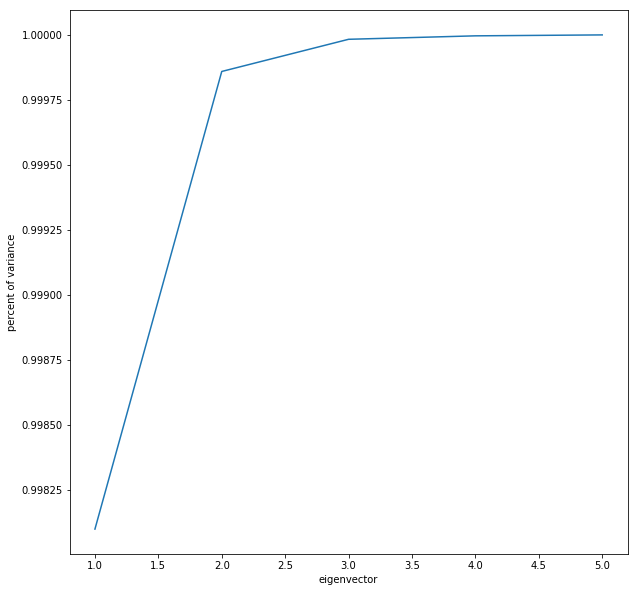

In [432]:
percent_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,10))
plt.xlabel('eigenvector')
plt.ylabel('percent of variance')
x =list(range(1,len(w)+1))
sb.lineplot(x=x,y=percent_var)

In [433]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [434]:
X_sm = sm.add_constant(X)
lr = sm.OLS(y,X_sm)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     391.5
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           3.20e-70
Time:                        13:49:36   Log-Likelihood:                -1970.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    253.930     52.285      0.000    1.28e+04    1.38e+04
x1            12.7969      0.488     26.242      0.000      11.835      13.758
x2           112.7710     11.613      9.711      0.000      89.873     135.669
==============================================================================
Omnibus:                       38.452   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.401
Skew:                           0.863   Prob(JB):                     2.85e-19
Kurtosis:                       5.649   Cond. No.                         521.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Further Resource:
https://www.youtube.com/playlist?list=PLbPhAbAhvjUzeLkPVnv0kc3_9rAfXpGtS

* #### Advantage: Main advantage is that it effectively removes multi-colinearity
* #### Disadvantage: The explainability of the features is lost